## Teoría de perturbaciones

Consiste en resolver un sistema perturbado(se conoce la solución al no perturbado), y donde el interés es conocer la contribución de la parte perturbada $H'$ al nuevo sistema total. 

$$ H = H^{0} + H'$$

Para sistemas no degenerados, la corrección a la energía a primer orden se calcula como 

$$ E_{n}^{(1)} = \int\psi_{n}^{(0)*} H' \psi_{n}^{(0)}d\tau$$

** Tarea 1 : Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

In [16]:
### Solución
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cual realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level upon which we should perform the perturbation: ')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)
#Necesitamos definir un nuevo hamiltoniano. Este debe contener el original y agregar la perturbación

H = ((-hbar**2)/(2*m_e)*diff(wavefuncn, x, 2) + wavefuncn*(m_e*(omega*x)**2)/2) + wavefuncn*sympify(input('Perturbation: '))

#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
E0


#here we perform the inner product integral
innerproduct = conjugate(wavefuncn)*H                                  
E = integrate(innerproduct, (x, -oo,oo))
PorcErr = (((E-E0)*100)/E0)

E

Energy level upon which we should perform the perturbation: 1
Angular frequency, 1 is suggested: 3
Perturbation: x**2


       2                         
2.25⋅h̅                          
──────── + 5.48884561404943e+29⋅ℏ
   ℏ                             

Y la corrección a la función de onda, también a primer orden, se obtiene como:

 $$ \psi_{n}^{(1)} = \sum_{m\neq n} \frac{\langle\psi_{m}^{(0)} | H' | \psi_{n}^{(0)} \rangle}{E_{n}^{(0)} - E_{m}^{(0)}} \psi_{m}^{(0)}$$

**Tarea 2: Programar esta ecuación si conoces $H^{0}$ y sus soluciones. **

Energy level for which we are going to calculate the corrected wavefunction: 1
Highest energy level we are going to consider:1
Angular frequency, 1 is suggested: 2
Perturbation: x


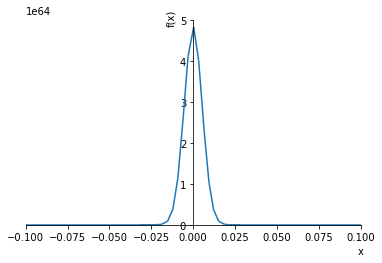

In [17]:
### Solución
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cual realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level for which we are going to calculate the corrected wavefunction: ')))
i= Abs(sympify(input('Highest energy level we are going to consider:')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)

#Necesitamos definir un nuevo hamiltoniano. Este debe contener el original y agregar la perturbación

H =  wavefuncn*sympify(input('Perturbation: '))

#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
psicorr = 0

for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        product = conjugate(psim)*H
        innerproduct = integrate(product, (x,-oo,oo))
        Em = E_n(m, omega)
        corr = ((innerproduct)/(E0-Em))*psim
        psicorr = psicorr + corr
    
    
    else:
        psicorr = psicorr
        
#here we perform the inner product integral
innerproduct = conjugate(wavefuncn)*H                                  
E = E0 + integrate(innerproduct, (x, -oo,oo))
Err = (((E-E0)*100)/E0)

psipert = wavefuncn + psicorr
psipert.evalf()
psiplot = conjugate(psipert)*psipert
E
plot(psiplot,(x,-0.1,0.1))

**Tarea 3: Investigue las soluciones a segundo orden y también programe las soluciones. **

In [21]:
### Solución
#La forma es extremadamente similar para la corrección de la energía a segundo orden. Solo trabajamos con energía
#en vez de funciones de onda.
#Importar de sympy el hamiltoniano y eigenfunciones para el oscilador armónico cuántico
from sympy.physics.qho_1d import psi_n
from sympy.physics.qho_1d import E_n
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n, m, m_e, omega, hbar = symbols('n m m_e omega hbar', real = True, constant = True)
var('x')

m_e = 9.10938356e-31
#Necesitamos seleccionar un nivel energético, sobre el cual realizar la corrección debida a la perturbación
n = Abs(sympify(input('Energy level for which we are going to calculate the energy correction: ')))
i= Abs(sympify(input('Highest energy level we are going to consider for our calculations:')))
omega = sympify(input('Angular frequency, 1 is suggested: '))
#Unperturbed wavefunctions
wavefuncn = psi_n(n, x, m_e, omega)

#Energía previa a la perturbación
E0 = E_n(n, omega)

#Necesitamos definir un nuevo hamiltoniano. Este debe agregar la perturbación

H =  wavefuncn*sympify(input('Perturbation: '))

integrandoprimerorden = conjugate(wavefuncn)*H
primerorden = integrate (integrandoprimerorden, (x,-oo,oo))
#Energy of the unperturbed H.O. Hamiltonian
E0 = E_n(n, omega)
Ecorr = 0

#La primera parte de la corrección a 2º orden es la de primer orden


for m in range(i):
    if m !=n:
        psim= psi_n(m, x, m_e, omega)
        product = conjugate(psim)*H
        innerproduct = integrate(product, (x,-oo,oo))
        Em = E_n(m, omega)
        corr = ((innerproduct)**2/(E0-Em))
        Ecorr = Ecorr + corr
    
    
    else:
        Ecorr = Ecorr
        
#here we perform the inner product integral
#innerproduct = conjugate(wavefuncn)*H                                  
#E = E0 + integrate(innerproduct, (x, -oo,oo))
#Err = (((E-E0)*100)/E0)

#psipert = wavefuncn + psicorr
#psiplot = conjugate(psipert)*psipert


E = E0 + primerorden + Ecorr

E
#plot(psiplot,(x,-0.1,0.1))



Energy level for which we are going to calculate the energy correction: 1
Highest energy level we are going to consider for our calculations:10
Angular frequency, 1 is suggested: 1
Perturbation: x**3


                                                2      
                        2   1.883130520616e+59⋅ℏ    3⋅ℏ
- 1.17409001625997e+91⋅ℏ  - ───────────────────── + ───
                                      π              2 

**Tarea 4.  Resolver el átomo de helio aplicando los programas anteriores.** 

In [19]:
from sympy.physics.hydrogen import R_nl
from sympy.physics.hydrogen import E_nl
from sympy import *
from sympy import init_printing; init_printing(use_latex = 'mathjax')

n1, n2, l1, l2, m, m_e, hbar, Z = symbols('n1 n2 l1 l2 m m_e hbar Z', real = True, constant = True)


var('r1 r2 theta1 theta2 phi1 phi2')

Z = 1

n1 = 1
l1 = 0
n2 = 1
l2 = 0

#We now introduce our unperturbed wavefunctions
WF1 = R_nl(n1, l1, r1, Z)

WF2 = R_nl(n2, l2, r2, Z)

#And the unperturbed energies:
E0 = 2* E_nl(n1, Z) #Since both electrons are in the ground state

#We need to define a term for the distance between the two elefctrons

r12 = abs(r1-r2)
#The perturbed hamiltonian is given by
Hpert = 1/r12

#We now introduce the argument for the innerproduct

innerproductarg = integrate(((r1**2)/(r2)*WF1**2), (r1, 0, r2)) + integrate((r1*WF1**2), (r1, r2, oo))



Epert = integrate((innerproductarg*r2**2*WF2**2), (r2, 0, oo))

Epert

Etot = E0 + Epert

Etot

-3/8

**Tarea 5: Método variacional-perturbativo. **

Este método nos permite estimar de forma precisa $E^{(2)}$ y correcciones perturbativas de la energía de órdenes más elevados para el estado fundamental del sistema, sin evaluar sumas infinitas. Ver ecuación 9.38 del libro. 

**Resolver el átomo de helio, considerando este método (sección 9.4), como mejor le parezca. **

**Tarea 6. Revisar sección 9.7. **

Inicialmente a mano, y sengunda instancia favor de intentar programar sección del problema, i.e. integral de Coulomb  e integral de intercambio.

## Siguiente: Segunda parte, Octubre
Simetrías moleculares y Hartree-Fock

NameError: name 'pi' is not defined